# Kmeans

Dado un conjunto de datos, se pretende agruparlos en clusters dependiendo de la distancia de cada elemento al centroide de cada grupo

## 1. Revisión  del algoritmo

Dado un conjunto de datos X de dimensiones (10,2) implementaremos el algoritmo para determinar dos clusters, en donde los elementos tienen características similares

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [7]:
# df Conjunto de datos de entrada. Dos características y 10 datos

df = np.random.randint(1, 101, size=(20, 2))
print(df)

[[35 19]
 [69 38]
 [98 54]
 [24 86]
 [48  8]
 [ 8  8]
 [90 45]
 [69 86]
 [41 15]
 [25  4]
 [41 42]
 [57  6]
 [92 45]
 [46 60]
 [36  9]
 [97 59]
 [78 32]
 [96 83]
 [ 5 22]
 [67 97]]


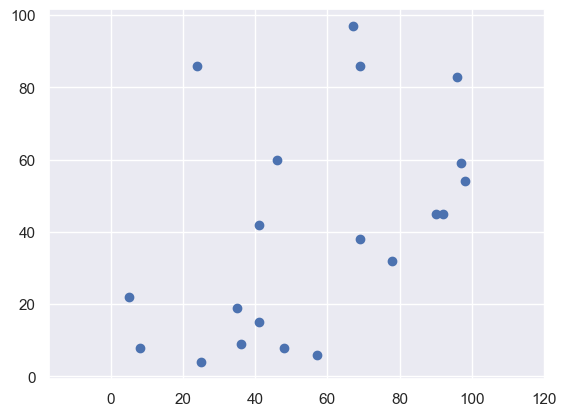

In [26]:
# Realicemos un scatterplot
sns.set()

plt.axis('equal') #Misma escala de los ejes
plt.scatter(df[:,0],df[:,1])

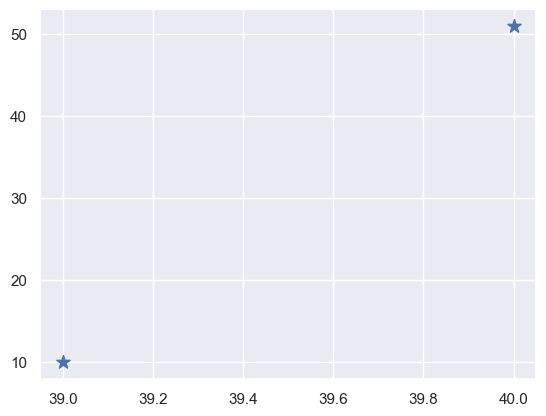

[39 10] [40 51]


In [27]:
# Iniciamos los centroides
ck = np.random.randint(np.min(df),np.max(df), size=(2, 2))

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

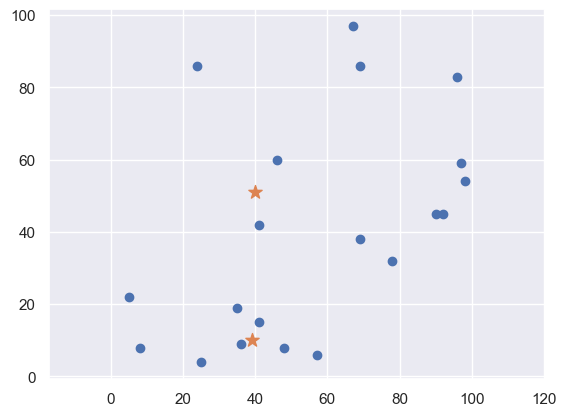

[39 10] [40 51]


In [28]:
plt.axis('equal') #Misma escala de los ejes
plt.scatter(df[:,0],df[:,1])

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

[39 10] [40 51]
iteration:  0


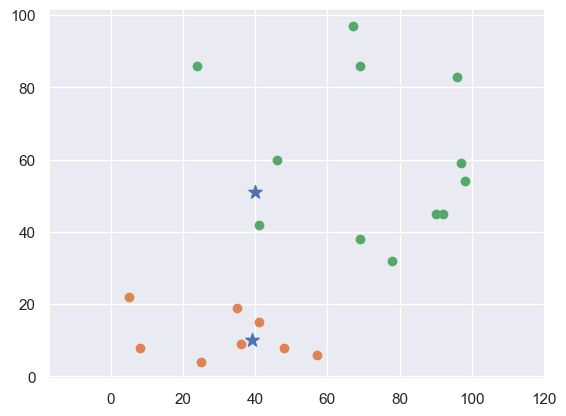

[31 11] [72 60]
iteration:  1


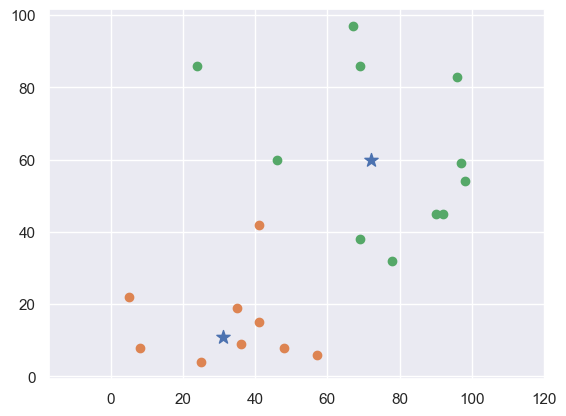

[32 14] [75 62]
iteration:  2


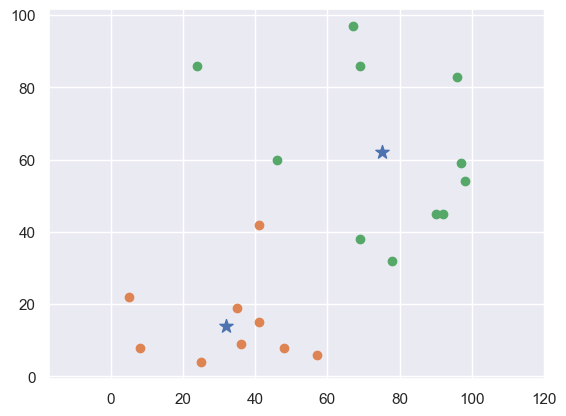

[32 14] [75 62]
iteration:  3


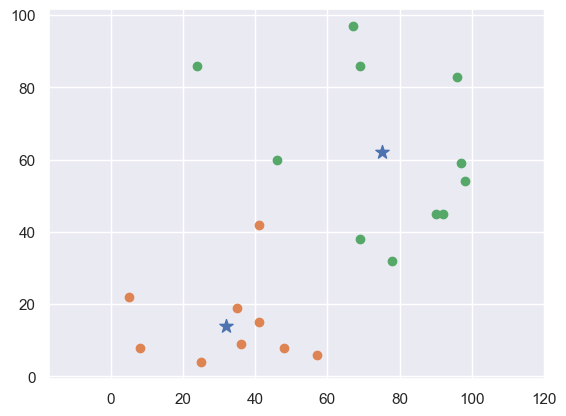

[32 14] [75 62]
iteration:  4


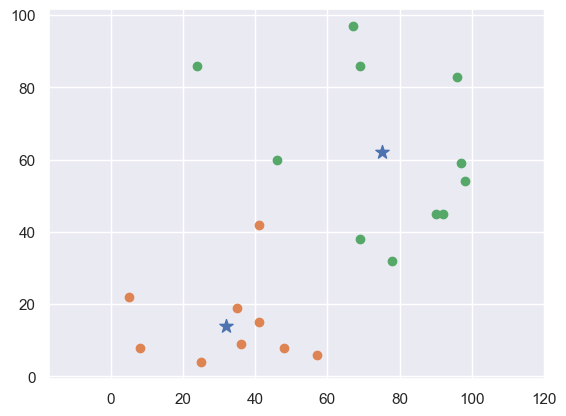

In [29]:
# Calculamos las distancias de cada dato al centroide y reasignamos a los conjuntos C1 y C2
for iteration in range(5):
  C1 = []
  C2 = []
  i=0
  print(ck[0,:],ck[1,:])
  for x in df:
    dst1 = distance.euclidean(df[i,:], ck[0,:])
    dst2 = distance.euclidean(df[i,:], ck[1,:])

    if dst1 < dst2:
      C1.append(df[i,:])
    else: 
      C2.append(df[i,:])
    i = i+1

  print('iteration: ', iteration)

  AC1=np.array(C1)
  AC2=np.array(C2)

  plt.axis('equal')
  plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
  plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
  plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
  plt.show()

  # Actualizamos las coordenadas de los centroides
  ck[0,0] = np.mean(AC1[:,0])
  ck[0,1] = np.mean(AC1[:,1])

  ck[1,0] = np.mean(AC2[:,0])
  ck[1,1] = np.mean(AC2[:,1])


## Predicción

El dato Xn pertenece al cluster:1 con centroide [32 14]


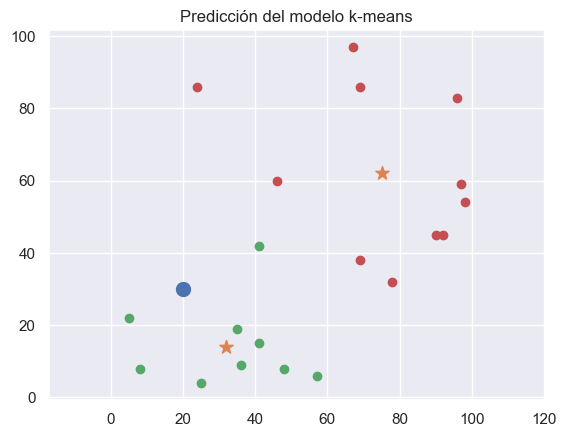

In [34]:
# Dado un nuevo dato xn, se asigna al conjunto C1 o C2 teniendo en cuenta la distancia
# del elemento a los centroides de cada grupo

# xn, nuevo dato
xn = (20,30)

# Distancia de xn a cada centroide
dst1 = distance.euclidean(xn, ck[0,:])
dst2 = distance.euclidean(xn, ck[1,:])

if dst1 < dst2:
  print('El dato Xn pertenece al cluster:{} con centroide {}'.format(1,ck[0,:]))
else:
  print('El dato Xn pertenece al cluster:{} con centroide {}'.format(2,ck[1,:]))

plt.axis('equal')
plt.title('Predicción del modelo k-means')
plt.scatter(xn[0],xn[1],s=100,marker='o')
plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
plt.show()